# The Sparks Foundation

## Data Science and Business Analytics (GRIPJUNE'21)

## Task 7: Stock Price/Performance Prediction 
We will Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
 
## Algorithm : RandomForestRegressor


### Author:  Amarjeet
### Historical Stock Price Dataset: https://finance.yahoo.com
I have downloaded the Historical Stock Prices data of HDFC Bank Ltd., listed on NSE, from finance.yahoo.com 
### News Headlines Dataset: https://bit.ly/36fFPI6
### ML Library: Scikit-Learn

### So let's get started

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HDFC_Bank = pd.read_csv('C:\\Users\\Dell no.1\\Desktop\\Amarjeet\\Coursera\\Python for machine learning and data science\\Stock Price Prediction\\HDFCBANK.NS.csv')
print('HDFC Bank Ltd. Historical Stock Price dataset loaded successfully.')

HDFC Bank Ltd. Historical Stock Price dataset loaded successfully.


In [3]:
HDFC_Bank #Viewing Stock Price dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030000,3.030000,2.925000,2.980000,2.428210,350000.0
1,1996-01-02,2.980000,3.025000,2.950000,2.975000,2.424136,412000.0
2,1996-01-03,2.975000,2.995000,2.950000,2.985000,2.432283,284000.0
3,1996-01-04,2.985000,2.980000,2.940000,2.965000,2.415987,282000.0
4,1996-01-05,2.965000,2.980000,2.950000,2.960000,2.411913,189000.0
...,...,...,...,...,...,...,...
6401,2021-05-27,1473.099976,1489.000000,1462.449951,1482.650024,1482.650024,10219748.0
6402,2021-05-28,1490.900024,1513.000000,1478.750000,1503.449951,1503.449951,8875010.0
6403,2021-05-31,1500.000000,1519.500000,1487.500000,1515.849976,1515.849976,7830527.0
6404,2021-06-01,1520.300049,1527.000000,1507.250000,1511.699951,1511.699951,5515081.0


In [4]:
# Stock Price data info
HDFC_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6406 entries, 0 to 6405
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6406 non-null   object 
 1   Open       6392 non-null   float64
 2   High       6392 non-null   float64
 3   Low        6392 non-null   float64
 4   Close      6392 non-null   float64
 5   Adj Close  6392 non-null   float64
 6   Volume     6392 non-null   float64
dtypes: float64(6), object(1)
memory usage: 350.5+ KB


In [5]:
news = pd.read_csv('C:\\Users\\Dell no.1\\Desktop\\Amarjeet\\Coursera\\Python for machine learning and data science\\Stock Price Prediction\\india-news-headlines.csv')
print('News Headlines dataset loaded successfully.')

News Headlines dataset loaded successfully.


In [6]:
news #Viewing News dataset

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [7]:
#News Headlines dataset info
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


## Feature Engineering

In [8]:
# Converting the Date Column into datetime variable
HDFC_Bank['Date'] = pd.to_datetime(HDFC_Bank['Date'])

In [15]:
# Creating a Date Column for News Headlines Data
news['Date']=pd.to_datetime(news['publish_date'],format = '%Y%m%d')

In [16]:
# Dropping unnecessary variables from News Headlines dataset
news = news.drop(['headline_category'], axis = 1)
news = news.drop('publish_date',axis=1)

In [18]:
# Creating Regular Expression by dropping unnecessary syntaxes
news.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [19]:
# Converting the text into lower case
news['headline_text'] = news['headline_text'].str.lower()

In [20]:
# setting Date as a index
news = news.set_index('Date')

In [21]:
news #Viewing the modified news data

,headline_text
Date,
2001-01-02,status quo will not be disturbed at ayodhya s...
2001-01-02,fissures in hurriyat over pak visit
2001-01-02,america s unwanted heading for india
2001-01-02,for bigwigs it is destination goa
2001-01-02,extra buses to clear tourist traffic
...,...
2020-12-31,covid despite dip in cases rajasthan amon...
2020-12-31,covid despite dip in cases rajasthan amon...
2020-12-31,covid despite dip in cases rajasthan amon...


In [22]:
# Grouping the news headlines by date
news = news.groupby('Date',).transform(lambda text: ' '.join(text))

# Dropping the duplicate rows
news = news.drop_duplicates()

## Textual Analysis
### Installing the textblob for calculating the sentiment scores of the headline text (Polarity and subjectivity)

In [25]:
!pip install textblob

In [26]:
from textblob import TextBlob  #Importing textblob

In [27]:
# Calculation of polarity score
news['polarity_score'] = news['headline_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# calculation of subjectivity score
news['subjectivity_score'] = news['headline_text'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

#### Merging the Stock Price and News Headlines dataset

In [30]:
data = pd.merge(HDFC_Bank,news, on = 'Date', how = 'inner' )

In [33]:
data.isnull().sum() #Checking for null values in the dataset

Date                   0
Open                  14
High                  14
Low                   14
Close                 14
Adj Close             14
Volume                14
headline_text          0
polarity_score         0
subjectivity_score     0
dtype: int64

In [34]:
# dropping the rows of null values
data = data.dropna(axis =0, subset= ['Open','High','Close','Adj Close','Volume'])

### Installing the vaderSentiment for calculating sentiment score ('compound', 'pos', 'neg', 'neu')

In [45]:
!pip install vaderSentiment

In [50]:
# importing the required nltk library for textual analysis
import nltk
nltk.download('vader_lexicon')
import re

[nltk_data] Downloading package vader_lexicon to C:\Users\Dell
[nltk_data]     no.1\AppData\Roaming\nltk_data...


In [51]:
# Importing SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [52]:
# Creating a SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer() 

In [54]:
# Calculation of compound sentiment score
data['Compound'] = data['headline_text'].apply(lambda text: SIA.polarity_scores(text)['compound'])

# Calculation of negative sentiment score
data['Negative'] = data['headline_text'].apply(lambda text: SIA.polarity_scores(text)['neg'])

# Calculation of neutral sentiment score
data['Neutral'] = data['headline_text'].apply(lambda text: SIA.polarity_scores(text)['neu'])

# Calculation of positive sentiment score
data['Positive'] = data['headline_text'].apply(lambda text: SIA.polarity_scores(text)['pos'])


<ipython-input-54-8c29f65d3997>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Compound'] = data['headline_text'].apply(lambda text: SIA.polarity_scores(text)['compound'])
<ipython-input-54-8c29f65d3997>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Negative'] = data['headline_text'].apply(lambda text: SIA.polarity_scores(text)['neg'])
<ipython-input-54-8c29f65d3997>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

## Exploratory Data Analysis (EDA)

In [55]:
# Dropping Irrelevant variables
data = data.drop(['High','Low','Volume','Adj Close','headline_text'],axis=1)

In [56]:
#Viewing the final dataset
data

,Date,Open,Close,polarity_score,subjectivity_score,Compound,Negative,Neutral,Positive
0,2001-01-02,22.285000,22.400000,0.143590,0.286859,-0.9792,0.121,0.809,0.071
1,2001-01-03,22.700001,22.584999,0.089286,0.392857,-0.8910,0.156,0.735,0.109
2,2001-01-04,22.834999,22.535000,0.093039,0.445360,0.7543,0.104,0.792,0.104
3,2001-01-05,22.545000,22.860001,0.264024,0.480553,0.9873,0.138,0.691,0.171
4,2001-01-08,22.700001,23.014999,-0.011266,0.400343,-0.9779,0.121,0.813,0.066
...,...,...,...,...,...,...,...,...,...
4949,2020-12-24,1389.400024,1397.099976,0.053569,0.387011,-0.9985,0.097,0.830,0.073
4950,2020-12-28,1405.000000,1412.849976,0.071405,0.409973,-0.9998,0.147,0.754,0.099
4951,2020-12-29,1421.050049,1427.199951,0.060775,0.415684,-0.9999,0.157,0.746,0.097
4952,2020-12-30,1439.900024,1432.500000,0.046930,0.436863,-0.9999,0.150,0.759,0.091


### Plot Stock Price Trend Over Years

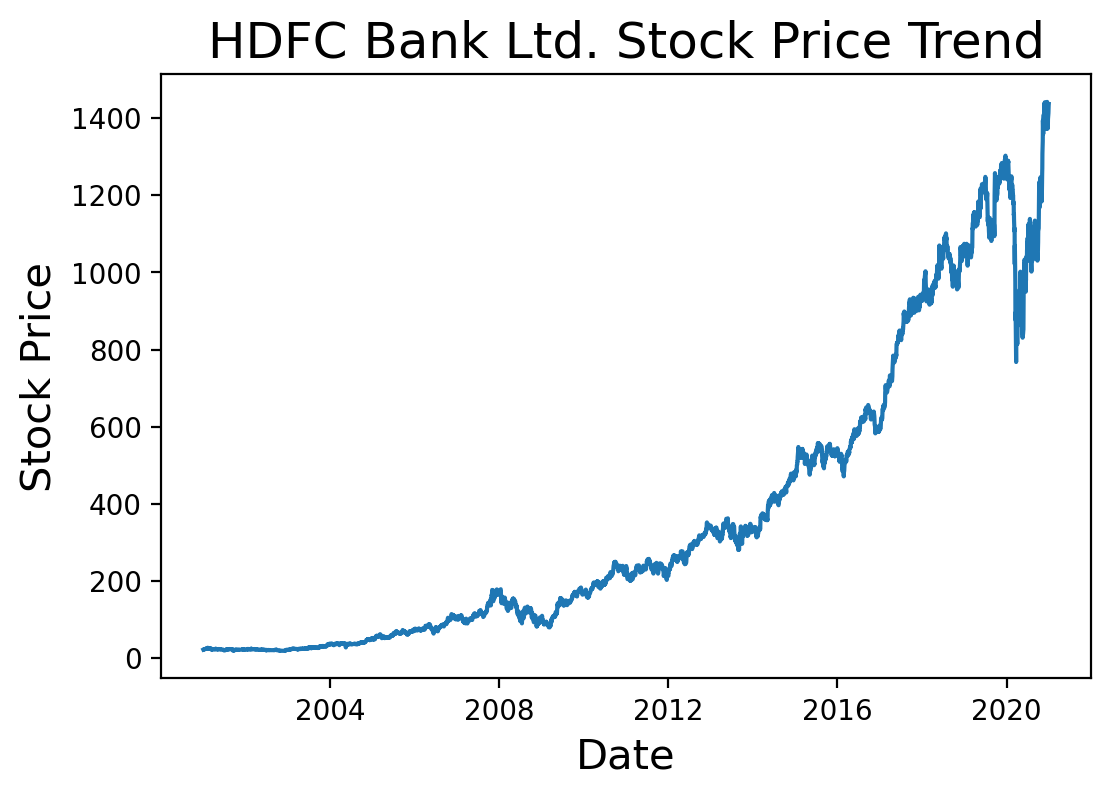

In [94]:
plt.figure(figsize = (6,4),dpi=200)
plt.title('HDFC Bank Ltd. Stock Price Trend',fontsize=18)
plt.ylabel('Stock Price', fontsize = 15)
plt.xlabel('Date',fontsize=15)
plt.plot(data['Date'],data['Close'])
plt.show()

### Plot Moving Average of Stock Price

In [59]:
# Calculation of Moving Average
Moving_average = data['Close'].rolling(window =30 ).mean()
Moving_average

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
4949    1396.398328
4950    1397.161662
4951    1399.011662
4952    1401.468327
4953    1402.396663
Name: Close, Length: 4954, dtype: float64

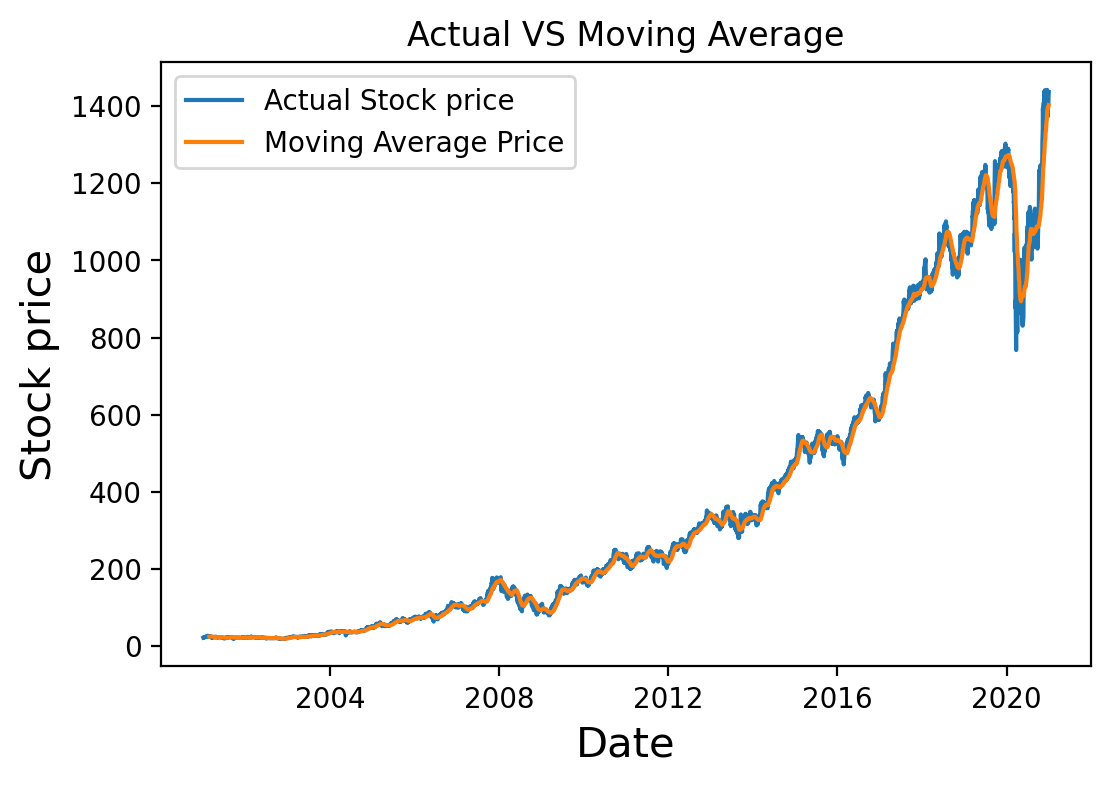

In [95]:
# Plotting Moving Average along with Actual Stock Price
plt.figure(figsize=(6,4),dpi=200)
plt.title('Actual VS Moving Average')
plt.ylabel('Stock price',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.plot(data['Date'],data['Close'], label='Actual Stock price')
plt.plot(data['Date'],Moving_average,label = 'Moving Average Price')
plt.legend()
plt.show()

In [61]:
# Descriptive Statistics
data.describe()

,Open,Close,polarity_score,subjectivity_score,Compound,Negative,Neutral,Positive
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,362.677503,362.575753,0.068137,0.400751,-0.906807,0.155519,0.739868,0.104613
std,374.049398,373.807318,0.035160,0.035860,0.385146,0.026328,0.034806,0.022018
min,18.900000,18.799999,-0.233333,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,69.699997,69.502502,0.047799,0.382897,-0.999900,0.141000,0.720000,0.093000
50%,219.550003,219.617501,0.067048,0.400367,-0.999700,0.156000,0.737000,0.104000
75%,537.437500,537.299988,0.087058,0.418363,-0.997725,0.171000,0.758000,0.115000
max,1451.300049,1441.800049,0.500000,1.000000,0.999900,0.444000,1.000000,0.608000


This Heatmap shows the correlation coef between different variables


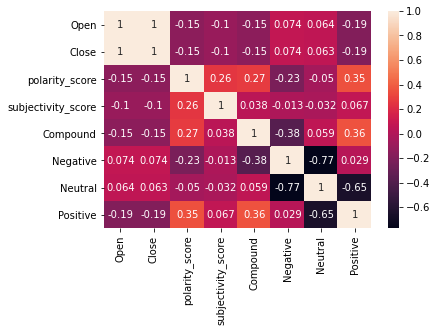

In [62]:
sns.heatmap(data.corr(),annot=True)
print('This Heatmap shows the correlation coef between different variables')

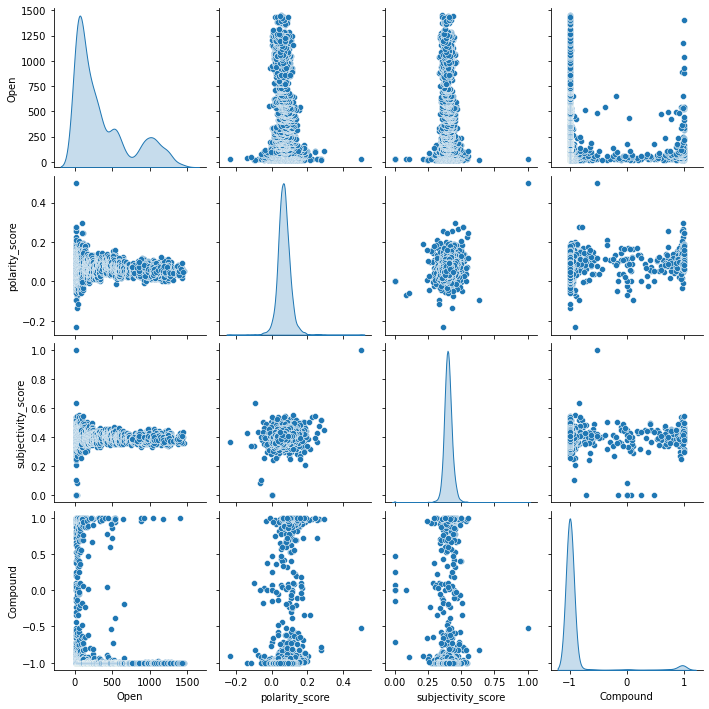

I have not taken the pairplot of positive,negative and neutral because positive,negative,neutral and compound somehow reflects the polarity score and taking only compound score would be sufficient.


In [63]:
# Plotting the pairplot
sns.pairplot(data[['Open','polarity_score','subjectivity_score','Compound']],diag_kind='kde')
plt.show()
print('I have not taken the pairplot of positive,negative and neutral because positive,negative,neutral and compound somehow reflects the polarity score and taking only compound score would be sufficient.')

## Introduce Skicit-Learn to create a hybrid model for stock price/performance prediction

#### Separate Label and Features i.e. divide the data into "features" (inputs) and "label" (output).

In [64]:
# Creating Feature data which includes 'Open','polarity_score','Compound','subjectivity_score'.
X = data[['Open','polarity_score','Compound','subjectivity_score']]

# Separating 'Close' price which is the label variable
y = data['Close']

#### Train | Test Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=35)

#### Scaling the Feature variables

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [68]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Introducing RandomForestRegressor Algorithm

In [69]:
from sklearn.ensemble import RandomForestRegressor # Importing the Algorithm

In [70]:
base_model = RandomForestRegressor()  #Creating a base model

#### Using GridSearchCV for the search of best hyperparameters

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
# searching for these hyperparameters
n_estimators=[40,64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             }

In [73]:
# Creating the GridSearchCV model
grid_model = GridSearchCV(base_model, param_grid, scoring='neg_mean_squared_error')

In [74]:
grid_model.fit(X_train,y_train) #fit grid_model on X_train,y_train

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dell no.1\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [40, 64, 100, 128, 200]},
             scoring='neg_mean_squared_error')

In [75]:
grid_model.best_params_ #Best hyperparameter value given by GridSearchCV

{'bootstrap': True, 'max_features': 3, 'n_estimators': 128}

### Create Final RandomForestRegressor model using the hyperparameter given by GridSearchCV

In [76]:
Model = RandomForestRegressor(n_estimators=128,max_features=3,bootstrap=True)

In [77]:
# fit the model on training set
Model.fit(X_train,y_train)

RandomForestRegressor(max_features=3, n_estimators=128)

#### Prediction on testing set

In [78]:
pred_stock_price = Model.predict(X_test)

In [79]:
print('Actual VS Prediction')
actual_VS_predicted = pd.DataFrame({'Actual': y_test, 'Predicted':pred_stock_price})
actual_VS_predicted

Actual VS Prediction


,Actual,Predicted
1955,109.330002,109.450079
4715,1287.650024,1275.790247
3423,438.399994,428.770900
1140,63.195000,61.987540
1579,98.120003,97.492852
...,...,...
1452,93.099998,90.700391
828,37.849998,38.484570
3106,323.250000,316.348249
4436,1002.750000,1009.733588


### Evaluation

In [81]:
# Importing the metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('We will evaluate the model on the basis of 2 metrics,mean_absolute_error and mean_squared_error ')

We will evaluate the model on the basis of 2 metrics,mean_absolute_error and mean_squared_error 


In [83]:
MAE = mean_absolute_error(y_test, pred_stock_price) #Mean Absolute Error
MAE

4.169219048784103

In [84]:
RMSE = np.sqrt(mean_squared_error(y_test,pred_stock_price)) #Root Mean Squared Error
RMSE

7.768656347282939

The above calculated 'Mean squared error (MAE)' and 'Root Mean squared error (RMSE)' is acceptable as the mean closing price is 362.575753. And the MAE is approximately 1%, the RMSE is approximately 2% of the mean closing price.

In [85]:
#Important Features for predicting stock prices
pd.DataFrame(index=X.columns,data=Model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Open,0.912622
polarity_score,0.002250
Compound,0.084399
subjectivity_score,0.000728


the above data shows that the Opening Price is most important feature for determining stock prices which is nothing surprising (91.26% importance), from textual data, the compound score is most important feature which has 8.4% importance in determining the closing price followed by the polarity score which has 0.2% importance. 

### Plot  Actual VS Predicted Stock price

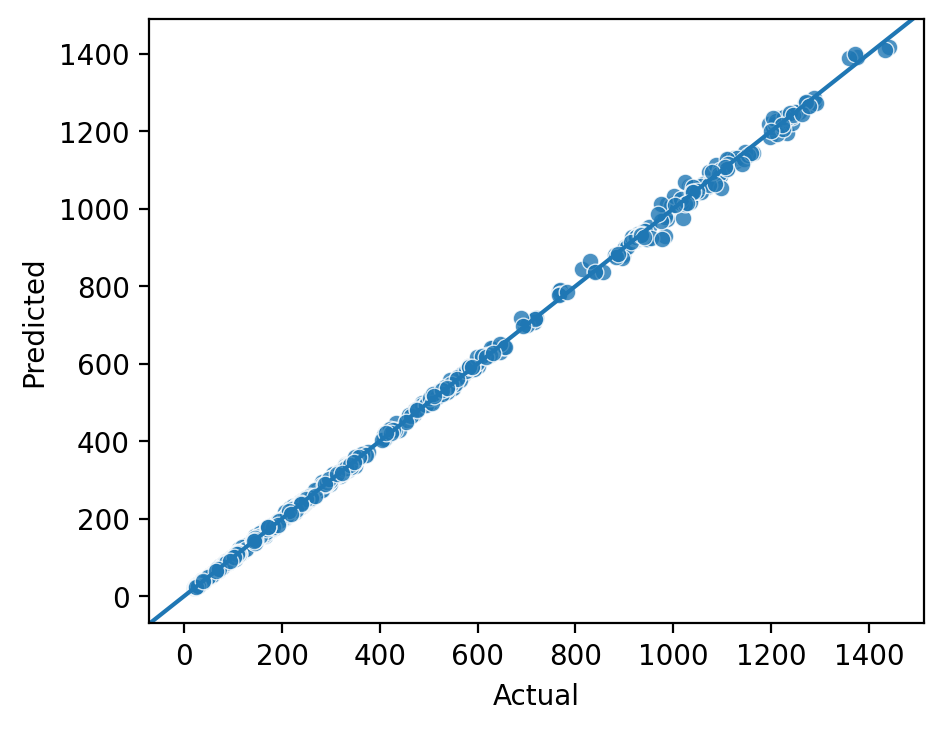

In [88]:
plt.figure(figsize=(5,4),dpi=200)
plt.axes()
sns.scatterplot(x='Actual',y='Predicted',data=actual_VS_predicted,alpha = 0.8)
plt.axline([0,0],[1,1])
plt.show()

The above plot shows the Actual and predicted stock prices, the straight line is a 45 degree line passing through origin, so more the points on the 45 degree line better the model performance. As we can see the Actual Vs predicted plot of our model is quite best fitted on the 45 degree line, which means that the model is performing well. 

In [90]:
# Test residual
test_res = y_test - pred_stock_price
test_res

1955    -0.120077
4715    11.859777
3423     9.629094
1140     1.207460
1579     0.627151
          ...    
1452     2.399607
828     -0.634572
3106     6.901751
4436    -6.983588
1171     0.702072
Name: Close, Length: 843, dtype: float64

#### Plot test residual

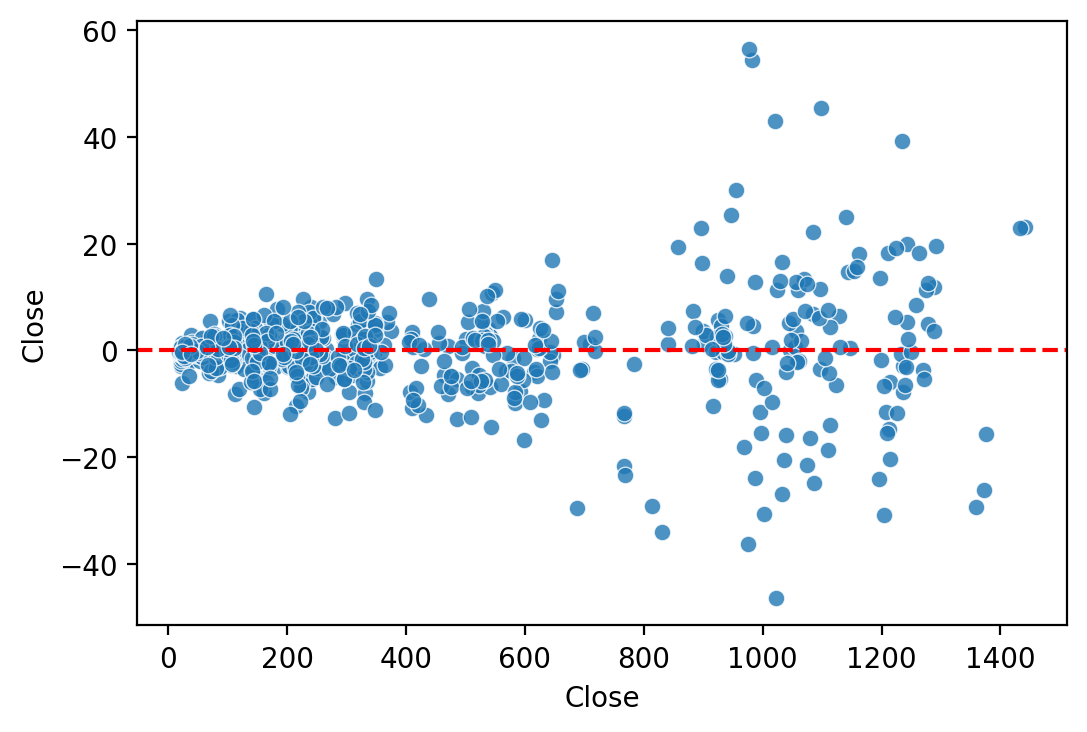

vertical distance of points from dashed line is the test residual


In [91]:
plt.figure(figsize=(6,4),dpi=200)
sns.scatterplot(x=y_test, y = test_res,alpha=0.8)

plt.axhline(y=0, color ='r', linestyle= '--')
plt.show()

print('vertical distance of points from dashed line is the test residual')

## Retrain the Model on full dataset
Once we are satisfied with the model, we will retrain the model on full data set in order to take full advantage of the dataset.

In [92]:
Model.fit(X,y)

RandomForestRegressor(max_features=3, n_estimators=128)

## Conclusion

### Features : [Open Price, polarity_score, Compound_score, subjectivity_score]
### Label : Closing price of HDFC bank Ltd. Stock
### Model : RandomForestClassifier
### Mean_Absolute_Error = 4.169219048784103
### Root_Mean_Squared_Error = 7.768656347282939 

# Thank You